# Contagious Disease Prediction
    
            Measles is a highly contagious viral infection caused by the measles virus (MeV), which primarily affects the respiratory system. It is characterized by symptoms such as high fever, cough, runny nose, red eyes, and a distinctive rash that typically starts on the face and spreads to the rest of the body. 

In [13]:
#Importing Libraries for analysis
import numpy as np                                  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Loading dataset,stored in a variable
a=pd.read_csv("measles.csv.zip")      
a   

,week,state,state_name,disease,cases,incidence_per_capita
0,192801,AL,ALABAMA,MEASLES,97,3.67
1,192801,AR,ARKANSAS,MEASLES,76,4.11
2,192801,AZ,ARIZONA,MEASLES,8,1.90
3,192801,CA,CALIFORNIA,MEASLES,74,1.38
4,192801,CO,COLORADO,MEASLES,85,8.38
...,...,...,...,...,...,...
145162,200252,NV,NEVADA,MEASLES,0,0.00
145163,200252,NY,NEW YORK,MEASLES,0,0.00
145164,200252,OH,OHIO,MEASLES,0,0.00
145165,200252,TX,TEXAS,MEASLES,0,0.00


### ATTRIBUTE INFORMATION


Week: The week during which the data was collected or reported.

State: This column represents an abbreviation or code for the state in which the data was collected. It could be represented as a string of characters.

State Name: Represents the full name of the state corresponding to the state abbreviation or code in the "State" column.

Disease: The type or name of the disease for which the cases or incidence rates are reported. It could be represented as a string of characters.

Cases: This column represents the total number of reported cases of the disease in a specific week and state. It is likely represented as an integer.

Incidence Per Capita: This column represents the number of reported cases per capita (per person) in a specific week and state. It is likely represented as a floating-point number, indicating the rate of disease spread relative to the population size.

## Data Analysing

In [15]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145167 entries, 0 to 145166
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   week                  145167 non-null  int64  
 1   state                 145167 non-null  object 
 2   state_name            145167 non-null  object 
 3   disease               145167 non-null  object 
 4   cases                 145167 non-null  int64  
 5   incidence_per_capita  145167 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.6+ MB


In [16]:
# To remove specified column, removing Nan valued columns
b=a.drop(columns=["state"])   
b

,week,state_name,disease,cases,incidence_per_capita
0,192801,ALABAMA,MEASLES,97,3.67
1,192801,ARKANSAS,MEASLES,76,4.11
2,192801,ARIZONA,MEASLES,8,1.90
3,192801,CALIFORNIA,MEASLES,74,1.38
4,192801,COLORADO,MEASLES,85,8.38
...,...,...,...,...,...
145162,200252,NEVADA,MEASLES,0,0.00
145163,200252,NEW YORK,MEASLES,0,0.00
145164,200252,OHIO,MEASLES,0,0.00
145165,200252,TEXAS,MEASLES,0,0.00


In [17]:
#statistical description about the data

b.describe()

,week,cases,incidence_per_capita
count,145167.000000,145167.000000,145167.000000
mean,196012.188417,128.617372,4.445870
std,1918.861491,392.418360,11.053309
min,192801.000000,0.000000,0.000000
25%,194410.000000,1.000000,0.030000
50%,195937.000000,11.000000,0.530000
75%,197451.000000,73.000000,3.510000
max,200252.000000,10402.000000,683.060000


In [18]:
#first 100 rows of the dataframe

b.head(100)

,week,state_name,disease,cases,incidence_per_capita
0,192801,ALABAMA,MEASLES,97,3.67
1,192801,ARKANSAS,MEASLES,76,4.11
2,192801,ARIZONA,MEASLES,8,1.90
3,192801,CALIFORNIA,MEASLES,74,1.38
4,192801,COLORADO,MEASLES,85,8.38
...,...,...,...,...,...
95,192803,LOUISIANA,MEASLES,48,2.33
96,192803,MASSACHUSETTS,MEASLES,1466,34.76
97,192803,MARYLAND,MEASLES,345,21.43
98,192803,MAINE,MEASLES,54,6.78


In [19]:
#last 100 rows of the dataframe

b.tail(100)

,week,state_name,disease,cases,incidence_per_capita
145067,200241,TEXAS,MEASLES,0,0.0
145068,200242,CALIFORNIA,MEASLES,0,0.0
145069,200242,FLORIDA,MEASLES,0,0.0
145070,200242,HAWAII,MEASLES,0,0.0
145071,200242,INDIANA,MEASLES,0,0.0
...,...,...,...,...,...
145162,200252,NEVADA,MEASLES,0,0.0
145163,200252,NEW YORK,MEASLES,0,0.0
145164,200252,OHIO,MEASLES,0,0.0
145165,200252,TEXAS,MEASLES,0,0.0


In [20]:
#To know the states present in the data
unique_State = b['state_name'].unique()
print(unique_State)

['ALABAMA' 'ARKANSAS' 'ARIZONA' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'DELAWARE' 'FLORIDA' 'GEORGIA' 'IOWA' 'ILLINOIS' 'INDIANA' 'KANSAS'
 'KENTUCKY' 'LOUISIANA' 'MASSACHUSETTS' 'MARYLAND' 'MAINE' 'MICHIGAN'
 'MINNESOTA' 'MISSOURI' 'MONTANA' 'NORTH CAROLINA' 'NEBRASKA' 'NEW JERSEY'
 'NEW MEXICO' 'NEW YORK' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'WASHINGTON' 'WISCONSIN' 'WEST VIRGINIA' 'WYOMING' 'IDAHO'
 'NORTH DAKOTA' 'DISTRICT OF COLUMBIA' 'NEW HAMPSHIRE' 'MISSISSIPPI'
 'VIRGINIA' 'NEVADA' 'HAWAII' 'ALASKA']


In [21]:
#data values of state Alaska

b_alaska = b['state_name']=='ALASKA'
alaska=b[b_alaska]
alaska

,week,state_name,disease,cases,incidence_per_capita
58936,195401,ALASKA,MEASLES,14,6.51
58987,195402,ALASKA,MEASLES,30,13.95
59038,195403,ALASKA,MEASLES,40,18.60
59088,195404,ALASKA,MEASLES,16,7.44
59139,195405,ALASKA,MEASLES,56,26.05
...,...,...,...,...,...
144048,200048,ALASKA,MEASLES,0,0.00
144068,200049,ALASKA,MEASLES,0,0.00
144088,200050,ALASKA,MEASLES,0,0.00
144108,200051,ALASKA,MEASLES,0,0.00


In [22]:
##data values of state Texas


b_texas = b['state_name']=='TEXAS'
texas=b[b_texas]
texas

,week,state_name,disease,cases,incidence_per_capita
35,192801,TEXAS,MEASLES,67,1.18
77,192802,TEXAS,MEASLES,36,0.63
117,192803,TEXAS,MEASLES,35,0.62
161,192804,TEXAS,MEASLES,21,0.37
206,192805,TEXAS,MEASLES,89,1.57
...,...,...,...,...,...
145107,200245,TEXAS,MEASLES,0,0.00
145118,200246,TEXAS,MEASLES,0,0.00
145129,200247,TEXAS,MEASLES,0,0.00
145152,200251,TEXAS,MEASLES,0,0.00


In [23]:
#data values of state Florida


b_flo = b['state_name']=='FLORIDA'
flo=b[b_flo]
flo

,week,state_name,disease,cases,incidence_per_capita
7,192801,FLORIDA,MEASLES,3,0.21
49,192802,FLORIDA,MEASLES,7,0.49
89,192803,FLORIDA,MEASLES,6,0.42
132,192804,FLORIDA,MEASLES,13,0.91
176,192805,FLORIDA,MEASLES,7,0.49
...,...,...,...,...,...
145110,200246,FLORIDA,MEASLES,0,0.00
145121,200247,FLORIDA,MEASLES,0,0.00
145133,200248,FLORIDA,MEASLES,0,0.00
145143,200251,FLORIDA,MEASLES,0,0.00


In [24]:
#data values of state California


b_cal = b['state_name']=='CALIFORNIA'
cal=b[b_cal]
cal

,week,state_name,disease,cases,incidence_per_capita
3,192801,CALIFORNIA,MEASLES,74,1.38
45,192802,CALIFORNIA,MEASLES,96,1.80
85,192803,CALIFORNIA,MEASLES,70,1.31
127,192804,CALIFORNIA,MEASLES,100,1.87
171,192805,CALIFORNIA,MEASLES,127,2.38
...,...,...,...,...,...
145109,200246,CALIFORNIA,MEASLES,0,0.00
145120,200247,CALIFORNIA,MEASLES,0,0.00
145132,200248,CALIFORNIA,MEASLES,0,0.00
145142,200251,CALIFORNIA,MEASLES,0,0.00


In [25]:
#data values of state Georgia


b_geo = b['state_name']=='GEORGIA'
geo=b[b_geo]
geo

,week,state_name,disease,cases,incidence_per_capita
8,192801,GEORGIA,MEASLES,34,1.17
50,192802,GEORGIA,MEASLES,173,5.96
133,192804,GEORGIA,MEASLES,251,8.65
177,192805,GEORGIA,MEASLES,314,10.82
222,192806,GEORGIA,MEASLES,196,6.75
...,...,...,...,...,...
144870,200150,GEORGIA,MEASLES,0,0.00
144892,200151,GEORGIA,MEASLES,0,0.00
144914,200152,GEORGIA,MEASLES,0,0.00
145144,200251,GEORGIA,MEASLES,0,0.00


### Randomly taking 5 states from data for analysing

In [37]:
c = pd.concat([alaska,texas,flo,cal,geo], ignore_index=True)  #concating the 5 state datas and storing c
c

,week,state_name,disease,cases,incidence_per_capita
0,195401,ALASKA,MEASLES,14,6.51
1,195402,ALASKA,MEASLES,30,13.95
2,195403,ALASKA,MEASLES,40,18.60
3,195404,ALASKA,MEASLES,16,7.44
4,195405,ALASKA,MEASLES,56,26.05
...,...,...,...,...,...
14553,200150,GEORGIA,MEASLES,0,0.00
14554,200151,GEORGIA,MEASLES,0,0.00
14555,200152,GEORGIA,MEASLES,0,0.00
14556,200251,GEORGIA,MEASLES,0,0.00


## Number of Cases by State 

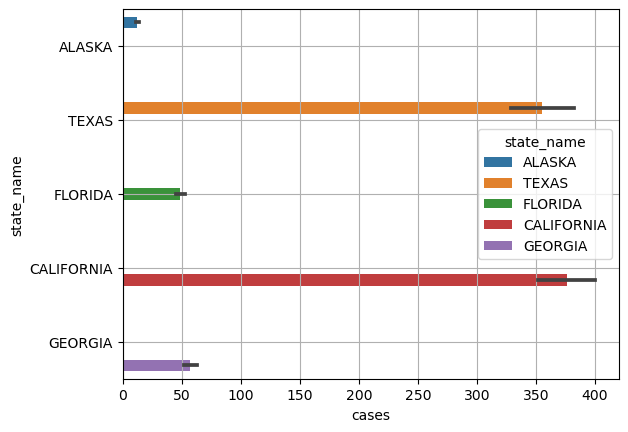

In [15]:
sns.barplot(data=c, y='state_name',x='cases', hue='state_name') 
plt.grid()        

          #plot shows no:of cases is greater in California

### Incidence per Capita Across States

<Axes: xlabel='state_name', ylabel='incidence_per_capita'>

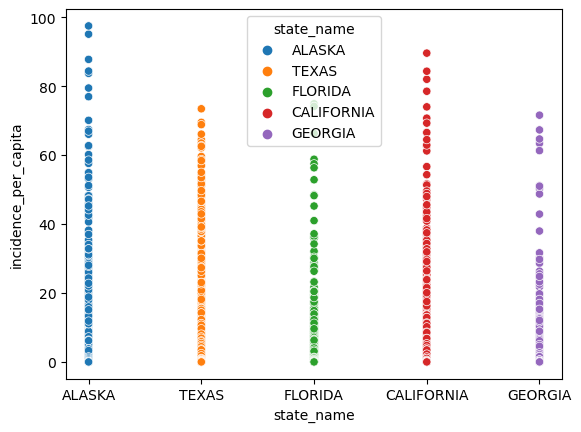

In [16]:
sns.scatterplot(data=c, x='state_name', y='incidence_per_capita', hue='state_name', marker='o') 
                                                                             # incidence per capita is greater in alaska

### Relationship between Cases and Incidence per Capita Across State

<Axes: xlabel='cases', ylabel='incidence_per_capita'>

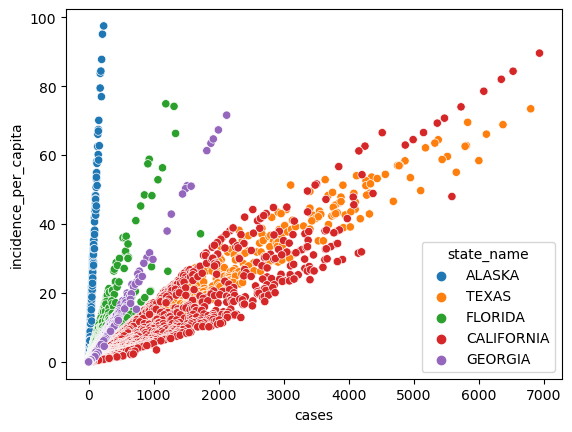

In [17]:
sns.scatterplot(data=c, x='cases', y='incidence_per_capita', hue='state_name', marker='o')

                
# more incidence_per_capita - ALASKA

### Encoding data

In [58]:
import warnings                                      # To remove warning
warnings.filterwarnings("ignore")

In [59]:
from sklearn.preprocessing import LabelEncoder   # To convert string values to numericals

In [60]:
le=LabelEncoder()
c["state_name"] = le.fit_transform(c["state_name"])
c


,week,state_name,disease,cases,incidence_per_capita
0,195401,0,0,14,6.51
1,195402,0,0,30,13.95
2,195403,0,0,40,18.60
3,195404,0,0,16,7.44
4,195405,0,0,56,26.05
...,...,...,...,...,...
14553,200150,3,0,0,0.00
14554,200151,3,0,0,0.00
14555,200152,3,0,0,0.00
14556,200251,3,0,0,0.00


In [61]:
le=LabelEncoder()
c["disease"] = le.fit_transform(c["disease"])
c

,week,state_name,disease,cases,incidence_per_capita
0,195401,0,0,14,6.51
1,195402,0,0,30,13.95
2,195403,0,0,40,18.60
3,195404,0,0,16,7.44
4,195405,0,0,56,26.05
...,...,...,...,...,...
14553,200150,3,0,0,0.00
14554,200151,3,0,0,0.00
14555,200152,3,0,0,0.00
14556,200251,3,0,0,0.00


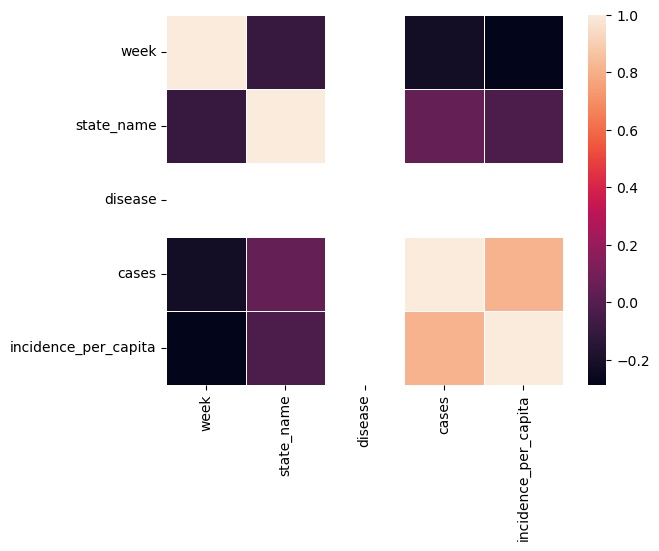

In [19]:
#heatmap representing the relationshp b/w the variables

sns.heatmap(c.corr(), cbar=True, linewidth=0.5)
plt.show()

# Data Prediction

#### Here in the data ,independent features are week,statename,incidence per capita  ,dependent or target feature is cases 

In [42]:
#Slicing the indenpent features

x=c.iloc[:,[0,1,2,4]].values
x                                    

array([[1.95401e+05, 0.00000e+00, 0.00000e+00, 6.51000e+00],
       [1.95402e+05, 0.00000e+00, 0.00000e+00, 1.39500e+01],
       [1.95403e+05, 0.00000e+00, 0.00000e+00, 1.86000e+01],
       ...,
       [2.00152e+05, 3.00000e+00, 0.00000e+00, 0.00000e+00],
       [2.00251e+05, 3.00000e+00, 0.00000e+00, 0.00000e+00],
       [2.00252e+05, 3.00000e+00, 0.00000e+00, 1.00000e-02]])

In [43]:
# slicing the dependent value
y=c.iloc[:,3].values                  
y

array([14, 30, 40, ...,  0,  0,  1], dtype=int64)

In [44]:
from sklearn.model_selection import train_test_split                     # train,test splitting

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=80,random_state=35)

In [46]:
x_test

array([[1.98718e+05, 2.00000e+00, 0.00000e+00, 6.00000e-02],
       [1.94004e+05, 3.00000e+00, 0.00000e+00, 1.01000e+00],
       [1.94508e+05, 4.00000e+00, 0.00000e+00, 4.97000e+00],
       [1.98548e+05, 2.00000e+00, 0.00000e+00, 7.00000e-02],
       [1.95226e+05, 3.00000e+00, 0.00000e+00, 3.52000e+00],
       [1.98927e+05, 4.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.99634e+05, 4.00000e+00, 0.00000e+00, 1.00000e-02],
       [1.94842e+05, 2.00000e+00, 0.00000e+00, 1.90000e-01],
       [1.97239e+05, 3.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.99038e+05, 3.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.98040e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.93543e+05, 2.00000e+00, 0.00000e+00, 6.00000e-02],
       [1.93621e+05, 1.00000e+00, 0.00000e+00, 3.30500e+01],
       [1.98003e+05, 1.00000e+00, 0.00000e+00, 2.00000e-02],
       [1.93122e+05, 4.00000e+00, 0.00000e+00, 1.51000e+00],
       [1.94729e+05, 3.00000e+00, 0.00000e+00, 7.90000e-01],
       [1.99437e+05, 1.0

In [47]:
x_train

array([[1.94850e+05, 4.00000e+00, 0.00000e+00, 9.34000e+00],
       [1.93444e+05, 2.00000e+00, 0.00000e+00, 6.00000e-02],
       [1.98951e+05, 1.00000e+00, 0.00000e+00, 5.30000e-01],
       ...,
       [1.94718e+05, 1.00000e+00, 0.00000e+00, 2.44000e+00],
       [1.99638e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.95040e+05, 2.00000e+00, 0.00000e+00, 1.80000e-01]])

In [48]:
y_train

array([712,   1, 159, ..., 240,   0,   5], dtype=int64)

In [49]:
y_test

array([   7,   32,  339,    8,  126,    0,    1,    5,    0,    0,    0,
          1, 2096,    6,   89,   26,    1,   59,    0,    0,    0,   17,
          1,    1, 1588,    0,    0,   75, 1702,    0,    0,  530,    2,
        140,   70,    0,   78,    1, 2185,  108,    5,   23,  125,  278,
         85,    0,   35,    1,   53,   64,   26,  621,   24,    0,    0,
         62,   96,    0,   48,    0,   47,   15,   71,    3,   42,   19,
          1, 1378, 2061,   85,  888,    1, 2789,   25,   42,   79,   96,
        646, 1697,    1], dtype=int64)

## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
regressor=LinearRegression()                                 #fitting
regressor.fit(x_train,y_train)

LinearRegression()

In [52]:
xpred1=regressor.predict(x_train)
xpred1

array([609.0502038 ,  -1.95122395,  18.03740104, ..., 109.24717425,
       -42.41813312,  12.42984835])

In [53]:
ypred1=regressor.predict(x_test)
ypred1

array([ 2.25517987e+01,  8.86790539e+01,  3.53780926e+02,  2.23424823e+01,
        2.40063030e+02,  8.58010179e+01,  8.96662466e+01,  1.20904439e+01,
        4.50779490e+01,  5.34361094e+01, -4.98424468e+01, -1.49126960e+00,
        1.88107393e+03, -1.59727256e+01,  1.46487105e+02,  7.92763136e+01,
       -1.04713649e+01,  6.49386053e+01,  9.03633934e+01,  4.27595933e+01,
       -4.25342832e+01,  2.71728487e+01, -3.50308057e+01, -3.52836597e+01,
        1.08735488e+03,  1.82417848e+01, -4.43880386e+01,  1.52891062e+02,
        1.05594360e+03,  5.71900803e+01, -5.31085873e+01,  4.60050456e+02,
       -1.42162900e+01,  9.39334863e+01,  1.64695507e+02, -4.23763191e+01,
        1.61830186e+02, -3.50212675e+01,  8.61582614e+02,  2.57197467e+02,
        8.10425254e+01,  7.07834191e+01,  2.97100351e+01,  2.37177115e+02,
        1.12454600e+02,  9.13344081e+01,  9.59067581e+01,  3.81960489e+00,
        1.04693295e+02,  1.47189430e+02,  9.27289156e+01,  2.53482920e+02,
        3.17293149e+01,  

In [54]:
trainingscore1=regressor.score(x_train,y_train)
trainingscore1

0.659601242188257

In [55]:
testingscore1=regressor.score(x_test,y_test)
testingscore1

0.828742564588906

In [34]:
from sklearn import metrics

In [35]:
print("mae"),metrics.mean_absolute_error(y_test,ypred1)

mae


(None, 122.0438062434644)

In [36]:
print("mse"),metrics.mean_squared_error(y_test,ypred1)

mse


(None, 60355.74322630252)

In [37]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred1))

rmse


(None, 245.67405892015242)

In [38]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred1))

rmae


(None, 11.047343854676761)

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2=r2_score(y_test,ypred1)
r2

0.828742564588906

## DecisionTree regression

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dtr=DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [46]:
dtr.fit(x_train,y_train)                                   #fitting

DecisionTreeRegressor()

In [47]:
xpred2=dtr.predict(x_train)
xpred2

array([712.,   1., 159., ..., 240.,   0.,   5.])

In [48]:
ypred2=dtr.predict(x_test)
ypred2

array([7.000e+00, 2.900e+01, 3.400e+02, 8.000e+00, 1.250e+02, 0.000e+00,
       1.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       2.217e+03, 5.000e+00, 9.300e+01, 2.600e+01, 0.000e+00, 5.900e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 1.000e+00, 1.000e+00,
       1.664e+03, 0.000e+00, 0.000e+00, 8.500e+01, 1.412e+03, 0.000e+00,
       0.000e+00, 5.640e+02, 3.000e+00, 1.370e+02, 6.800e+01, 0.000e+00,
       7.900e+01, 1.000e+00, 2.072e+03, 1.190e+02, 5.000e+00, 2.300e+01,
       1.320e+02, 2.870e+02, 8.500e+01, 0.000e+00, 3.500e+01, 1.000e+00,
       5.300e+01, 6.300e+01, 2.500e+01, 6.410e+02, 2.300e+01, 0.000e+00,
       0.000e+00, 6.300e+01, 9.500e+01, 0.000e+00, 4.800e+01, 0.000e+00,
       5.000e+01, 1.500e+01, 7.100e+01, 3.000e+00, 4.100e+01, 1.900e+01,
       1.000e+00, 1.491e+03, 1.935e+03, 8.800e+01, 9.800e+02, 1.000e+00,
       2.666e+03, 2.500e+01, 4.400e+01, 7.700e+01, 9.700e+01, 8.640e+02,
       1.633e+03, 1.000e+00])

In [49]:
trainingscore2=dtr.score(x_train,y_train)
trainingscore2

1.0

In [50]:
testingscore2=dtr.score(x_test,y_test)
testingscore2

0.9920860205247721

## RandomForest Regression

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
RFR=RandomForestRegressor()
RFR

RandomForestRegressor()

In [53]:
RFR.fit(x_train,y_train)                                         #fitting

RandomForestRegressor()

In [54]:
xpred3=RFR.predict(x_train)
xpred3

array([714.95,   1.  , 157.35, ..., 240.19,   0.  ,   4.98])

In [55]:
ypred3=RFR.predict(x_test)
ypred3

array([7.02000e+00, 3.16900e+01, 3.42780e+02, 8.29000e+00, 1.25460e+02,
       0.00000e+00, 1.00000e+00, 4.77000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 2.17238e+03, 4.96000e+00, 9.02300e+01,
       2.59500e+01, 1.00000e-02, 6.12200e+01, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.63400e+01, 1.00000e+00, 1.00000e+00, 1.62509e+03,
       0.00000e+00, 0.00000e+00, 8.14200e+01, 1.64772e+03, 0.00000e+00,
       0.00000e+00, 5.43750e+02, 3.32000e+00, 1.38440e+02, 7.17900e+01,
       0.00000e+00, 7.82800e+01, 1.00000e+00, 2.05671e+03, 1.14900e+02,
       5.00000e+00, 2.32500e+01, 1.24560e+02, 2.84680e+02, 8.29100e+01,
       0.00000e+00, 3.47800e+01, 1.02000e+00, 5.28800e+01, 6.32900e+01,
       2.43900e+01, 6.34540e+02, 2.32300e+01, 0.00000e+00, 0.00000e+00,
       6.15200e+01, 9.55500e+01, 0.00000e+00, 4.78600e+01, 0.00000e+00,
       4.81200e+01, 1.48800e+01, 7.09700e+01, 3.00000e+00, 4.12700e+01,
       1.90100e+01, 1.30000e+00, 1.45408e+03, 1.98907e+03, 8.491

In [56]:
trainingscore3=RFR.score(x_train,y_train)
trainingscore3

0.9993865931643109

In [57]:
testingscore3=RFR.score(x_test,y_test)
testingscore3

0.9975585323734184

In [58]:
from sklearn import metrics

In [59]:
print("mse"),metrics.mean_squared_error(y_test,ypred3) #mean squared error

mse


(None, 860.4390974999999)

In [60]:
print("mae"),metrics.mean_absolute_error(y_test,ypred3) #mean absolute error

mae


(None, 10.140999999999996)

In [61]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred3)) #mean squared error

rmse


(None, 29.333242192093255)

In [62]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred3)) #mean absolute error

rmae


(None, 3.1844936803203105)

In [63]:
from sklearn.metrics import r2_score

In [64]:
r4=r2_score(y_test,ypred3)
r4

0.9975585323734184

In [81]:
z=pd.DataFrame({"ML Models":["Linear","Decision Tree","Random Forest"],
               "Accuracy Score":[testingscore1,testingscore2,testingscore3]})
z

,ML Models,Accuracy Score
0,Linear,0.828743
1,Decision Tree,0.989795
2,Random Forest,0.997585


,ML Models,Accuracy Score
2,Random Forest,0.997585
1,Decision Tree,0.989795
0,Linear,0.828743


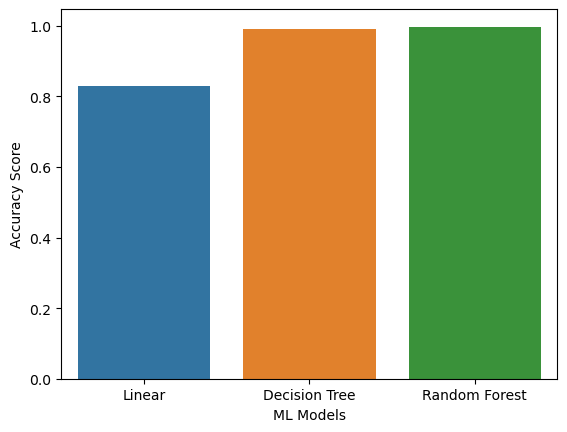

In [82]:
sns.barplot(x="ML Models",y="Accuracy Score",data=z)       
z.sort_values(by="Accuracy Score",ascending=False)

# Conclusion

## Test Data's Accuracy Of All Models

 Test data accuracy in Linear regression -0.8287 Test data accuracy in Decision Tree -0.9897 Test data accuracy in Random Forest -0.997

 HENCE BEST MODEL TO PREDICT CONTAGIOUS DISEASE RANGE FROM THE GIVEN DATASET IS RANDOM FOREST MODEL

# Input Method

In [65]:
week=int(input("Enter week :"))
state_name=int(input("Enter state_name:"))
disease=int(input("Enter disease :"))
incidence_per_capita=int(input("Enter incidence_per_capita:"))
New=[week,state_name,disease,incidence_per_capita] 
import numpy as np                                             # creating a variable including all the above input variables
numpy=np.asarray(New)                                           # converting into numpy array
Newarray=numpy.reshape(1,-1)
pred=regressor.predict(Newarray)
d=int(pred)
print("cases",d)



Enter week :195401
Enter state_name:0
Enter disease :0
Enter incidence_per_capita:6
cases 286
